**Булыгин Олег**:
* [LinkedIn](linkedin.com/in/obulygin)
* [Канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)


# Простой пример линейной регрессии

Поработаем с данными (анонимизированными) компании, которая предлагает услуги стилистов. Что более важно с точки зрения дохода: сайт или приложение?

Значимые столбцы:

* Avg. Session Length: среднее время консультации стилиста оффлайн
* Time on App: среднее время клиента в приложении
* Time on Website: средняя время клиента на сайте
* Length of Membership: сколько лет клиент пользуется услугами компании.

In [ ]:
# делаем импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Чтение данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/content/main/ecommers_customers/ecommerce.csv')

In [ ]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [ ]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## EDA

Посмотрим на график взаимосвязи времени, проведенного на сайте и трат клиента.

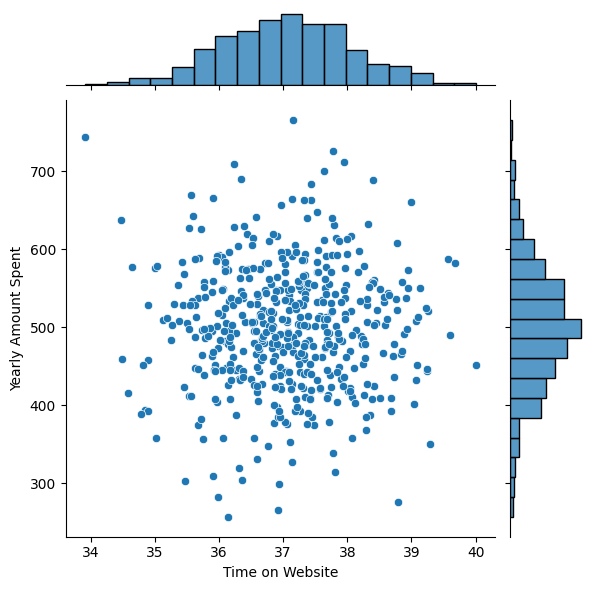

In [ ]:
sns.jointplot(x='Time on Website', y ='Yearly Amount Spent', data=df)

Аналогично посмотрим на время в приложении и траты.

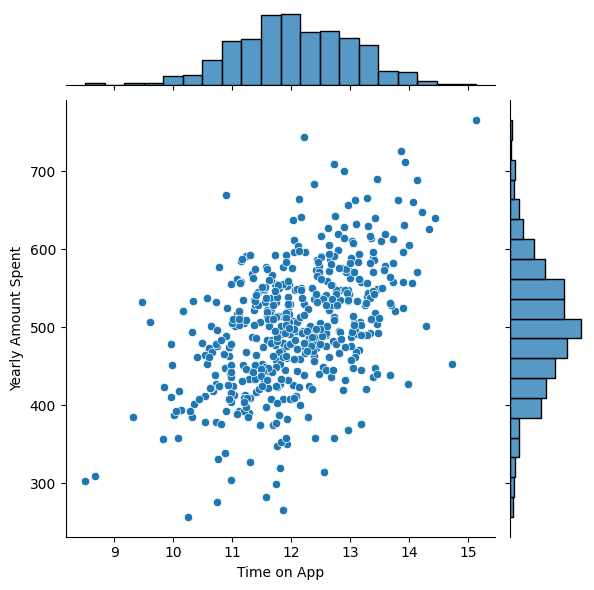

In [ ]:
sns.jointplot(x='Time on App', y ='Yearly Amount Spent', data=df)

Для примера построим hex bin plot для двух признаков.

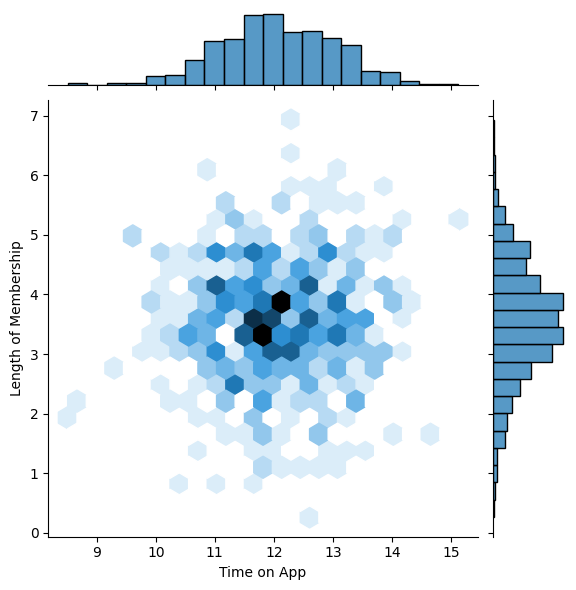

In [ ]:
sns.jointplot(x='Time on App', y ='Length of Membership', data=df, kind='hex')

Построим pairplot, чтобы выдвинуть гипотезы о взаимосвязи признаков.

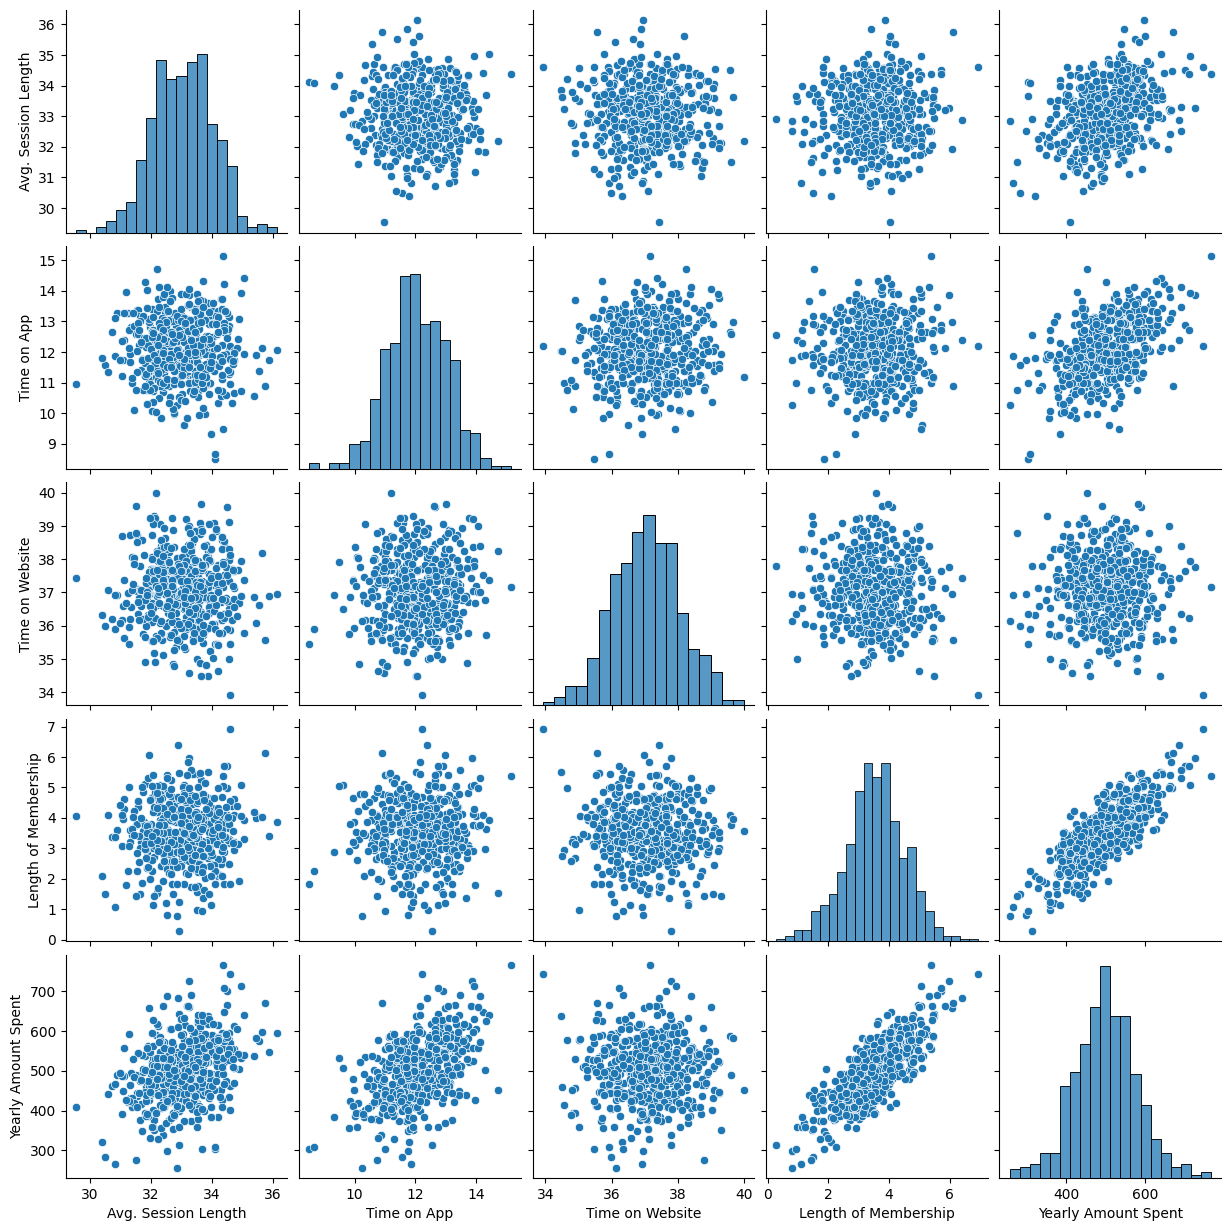

In [ ]:
sns.pairplot(df)

Мы видим явную взаимосвязь трат с Length of Membership.

Связь явно линейная.

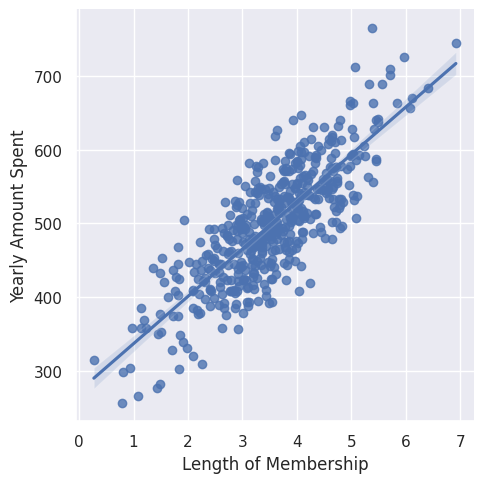

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

## Построение модели

Подготовим выборки для обучения модели

In [ ]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [ ]:
y = df['Yearly Amount Spent']

Разделим выборку на тестовую и тренировочную.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

Посмотрим на коэффициенты

In [ ]:
print(lm.coef_)

[25.69083176 38.68815596  0.45279908 61.71050259]


In [ ]:
predictions = lm.predict(X_test)

Построим точечный график фактических значений относительно прогнозных

Text(0.5, 0, 'Факт')

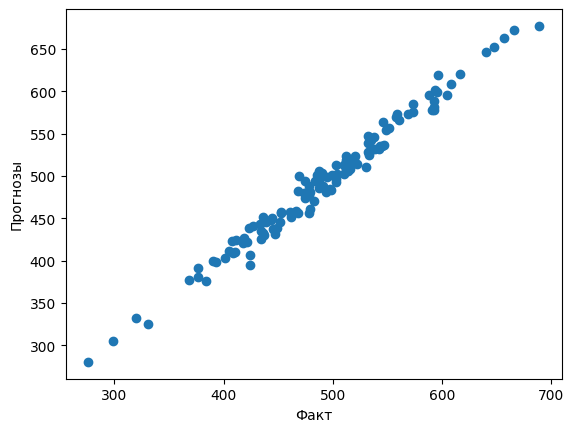

In [ ]:
plt.scatter(y_test, predictions)
plt.ylabel('Прогнозы')
plt.xlabel('Факт')

## Оценка модели

In [ ]:
import sklearn.metrics as metrics
print(f'R2: {metrics.r2_score(y_test, predictions)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

0.9806693454258992
R2: 0.9806693454258992
MAE: 8.460454170141151
MSE: 105.64514296279478
RMSE: 10.278382312542902


Посмотрим ещё на остатки

<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

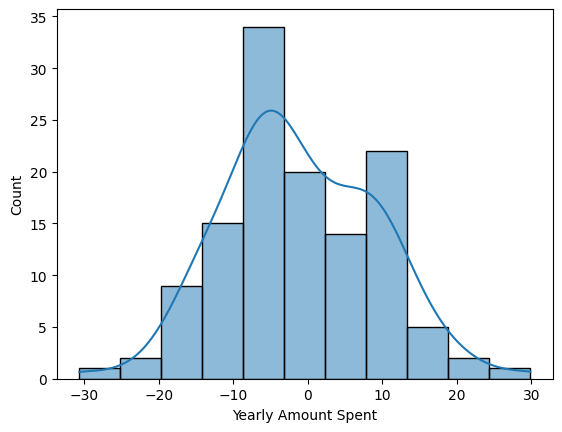

In [ ]:
sns.histplot((y_test-predictions), kde=True)

In [ ]:
pd.DataFrame(lm.coef_ , X.columns, columns=['Коэффициенты'])

Коэффициенты
Avg. Session Length      25.690832
Time on App              38.688156
Time on Website           0.452799
Length of Membership     61.710503